Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Uvod u znanost o podacima 2023/2024 
https://www.fer.unizg.hr/predmet/uuzop

------------------------------

### Projekt: Early-Stage Alzheimer's Disease Prediction Using Machine Learning Models

*https://www.frontiersin.org/articles/10.3389/fpubh.2022.853294/full*

**Veronika Žunar, 0036525058**

------------------------------

In [151]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Učitavanje podataka

In [115]:
df = pd.read_csv(".\dataset\oasis_longitudinal.csv")

In [116]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [117]:
cols = df.columns
desc = ["Subject Identification", "MRI Identification", "Group of patient (classification)", "Ordinal number of visit","MR delay", "Gender (M if Male, F if Female)", "Handedness", "Age in years", "Years of education", "Socio Economic Status", "Mini Mental State Examination", "Clinical Dementia Rating", "Estimated Total Intracranial Volume", "Normalize Whole Brain Volume", "Atlas Scaling Factor"]
types = df.dtypes

for col, d, typ in zip(cols, desc, types):
    print(f'\033[1m{col}\033[0m - {d} \033[1m[{typ}]\033[0m')

Subject ID - Subject Identification [object]
MRI ID - MRI Identification [object]
Group - Group of patient (classification) [object]
Visit - Ordinal number of visit [int64]
MR Delay - MR delay [int64]
M/F - Gender (M if Male, F if Female) [object]
Hand - Handedness [object]
Age - Age in years [int64]
EDUC - Years of education [int64]
SES - Socio Economic Status [float64]
MMSE - Mini Mental State Examination [float64]
CDR - Clinical Dementia Rating [float64]
eTIV - Estimated Total Intracranial Volume [int64]
nWBV - Normalize Whole Brain Volume [float64]
ASF - Atlas Scaling Factor [float64]


### 2. Prikaz tipova podataka i deskriptivne statistike

In [118]:
m, n = df.shape
print(f'Broj stupaca dataseta: {n}')
print(f'Broj redaka dataseta: {m}')

Broj stupaca dataseta: 15
Broj redaka dataseta: 373


In [119]:
sub_id = df['Subject ID'].unique()
num_subjects = len(sub_id)
print(f'Broj osoba uključenih u istraživanje: {num_subjects}')

handedness0 = df['Hand'].unique()
print(f'Jača ruka ispitanika: {handedness0}')

sex0 = df['M/F'].unique()
print(f'Spol ispitanika: {sex0}')

ages = df['Age'].unique()
print(f'Životna dob ispitanika: {ages}')

educ = df['EDUC'].unique()
print(f'Godine školovanja: {educ}')

ses = df['SES'].unique()
print(f'Tipovi socio-ekonomskog statusa: {ses}')

print()

groups0 = df['Group'].unique()
num_groups = len(groups0)
print(f'Rezultati podijeljeni u *{num_groups}* grupe: {groups0}')

visits = df['Visit'].unique()
print(f'Broj posjeta: {visits}')

cdr = df['CDR'].unique()
print(f'Klinički rang demencije: {cdr}')

Broj osoba uključenih u istraživanje: 150
Jača ruka ispitanika: ['R']
Spol ispitanika: ['M' 'F']
Životna dob ispitanika: [87 88 75 76 80 90 83 85 71 73 93 95 68 69 66 78 81 82 77 86 92 84 72 61
 64 74 60 62 91 79 89 70 94 97 65 67 63 96 98]
Godine školovanja: [14 12 18 16  8 20 13  6 17 15 23 11]
Tipovi socio-ekonomskog statusa: [ 2. nan  3.  4.  1.  5.]

Rezultati podijeljeni u *3* grupe: ['Nondemented' 'Demented' 'Converted']
Broj posjeta: [1 2 3 4 5]
Klinički rang demencije: [0.  0.5 1.  2. ]


In [120]:
df_copy = df.copy()

#### Pretvorba ne-numeričkih značajki u numeričke

In [121]:
label_encoder = LabelEncoder()
df_copy['M/F'] = label_encoder.fit_transform(df_copy['M/F'])
sex = df_copy['M/F'].unique()
print(f'Spol ispitanika: {sex} što odgovara oznakama {sex0}')

df_copy['Hand'] = label_encoder.fit_transform(df_copy['Hand'])
handedness = df_copy['Hand'].unique()
print(f'Jača ruka ispitanika: {handedness} što odgovara oznakama {handedness0}')

df_copy['Group'] = label_encoder.fit_transform(df_copy['Group'])
groups = df_copy['Group'].unique()
print(f'Rezultati podijeljeni u *{num_groups}* grupe: {groups} što odgovara oznakama {groups0}')

Spol ispitanika: [1 0] što odgovara oznakama ['M' 'F']
Jača ruka ispitanika: [0] što odgovara oznakama ['R']
Rezultati podijeljeni u *3* grupe: [2 1 0] što odgovara oznakama ['Nondemented' 'Demented' 'Converted']


In [122]:
df_copy.describe()

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,373.0,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.410188,1.882038,595.104558,0.428954,0.0,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.664461,0.922843,635.485118,0.495592,0.0,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,0.000000,1.000000,0.000000,0.000000,0.0,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,1.000000,0.000000,0.000000,0.0,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,2.000000,552.000000,0.000000,0.0,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,2.000000,873.000000,1.000000,0.0,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,2.000000,5.000000,2639.000000,1.000000,0.0,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


**count**: Broj neprekidnih (non-null) vrijednosti u svakom stupcu.  
**mean**: Srednja vrijednost, aritmetička sredina svih vrijednosti u stupcu.  
**std**: Standardna devijacija, mjera raspršenosti podataka koja pokazuje koliko su vrijednosti razdvojene od srednje vrijednosti.  
**min**: Minimum, najmanja vrijednost u stupcu.  
**25%**: Prvi kvartil (25. percentil) - vrijednost ispod koje se nalazi 25% podataka.  
**50%**: Drugi kvartil (50. percentil) - medijan, srednja vrijednost kad su podaci sortirani.  
**75%**: Treći kvartil (75. percentil) - vrijednost ispod koje se nalazi 75% podataka.  
**max**: Maksimum, najveća vrijednost u stupcu.  

Proučavajući ovu tablicu moćemo uočiti da za SES i MMSE nedostaje nekoliko zapisa.

### 3. Provjera nedostajućih i stršećih vrijednosti

#### Nedostajuće vrijednosti SES i MMSE

In [123]:
df_copy.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

#### Dodavanje nedostajućih vrijednosti

In [124]:
df_copy.loc[df_copy['SES'].isnull(), 'SES'] = df_copy.loc[:, 'SES'].median()
df_copy.loc[df_copy['MMSE'].isnull(), 'MMSE'] = df_copy.loc[:, 'MMSE'].median()

ses = df_copy['SES'].unique()
print(f'Tipovi socio-ekonomskog statusa: {ses}')

mmse = df_copy['MMSE'].unique()
print(f'Mini mental state examination: {mmse}')

df_copy.isnull().sum()

Tipovi socio-ekonomskog statusa: [2. 3. 4. 1. 5.]
Mini mental state examination: [27. 30. 23. 28. 22. 29. 24. 21. 16. 25. 26. 15. 20. 19.  7.  4. 17. 18.]


Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

#### Stršeće vrijednosti

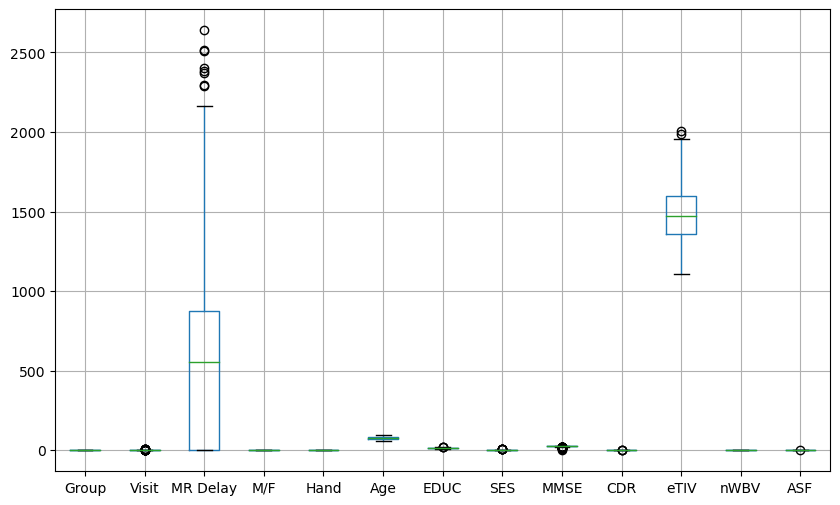

In [127]:
plt.figure(figsize=(10, 6))
df_copy.boxplot()
plt.show()

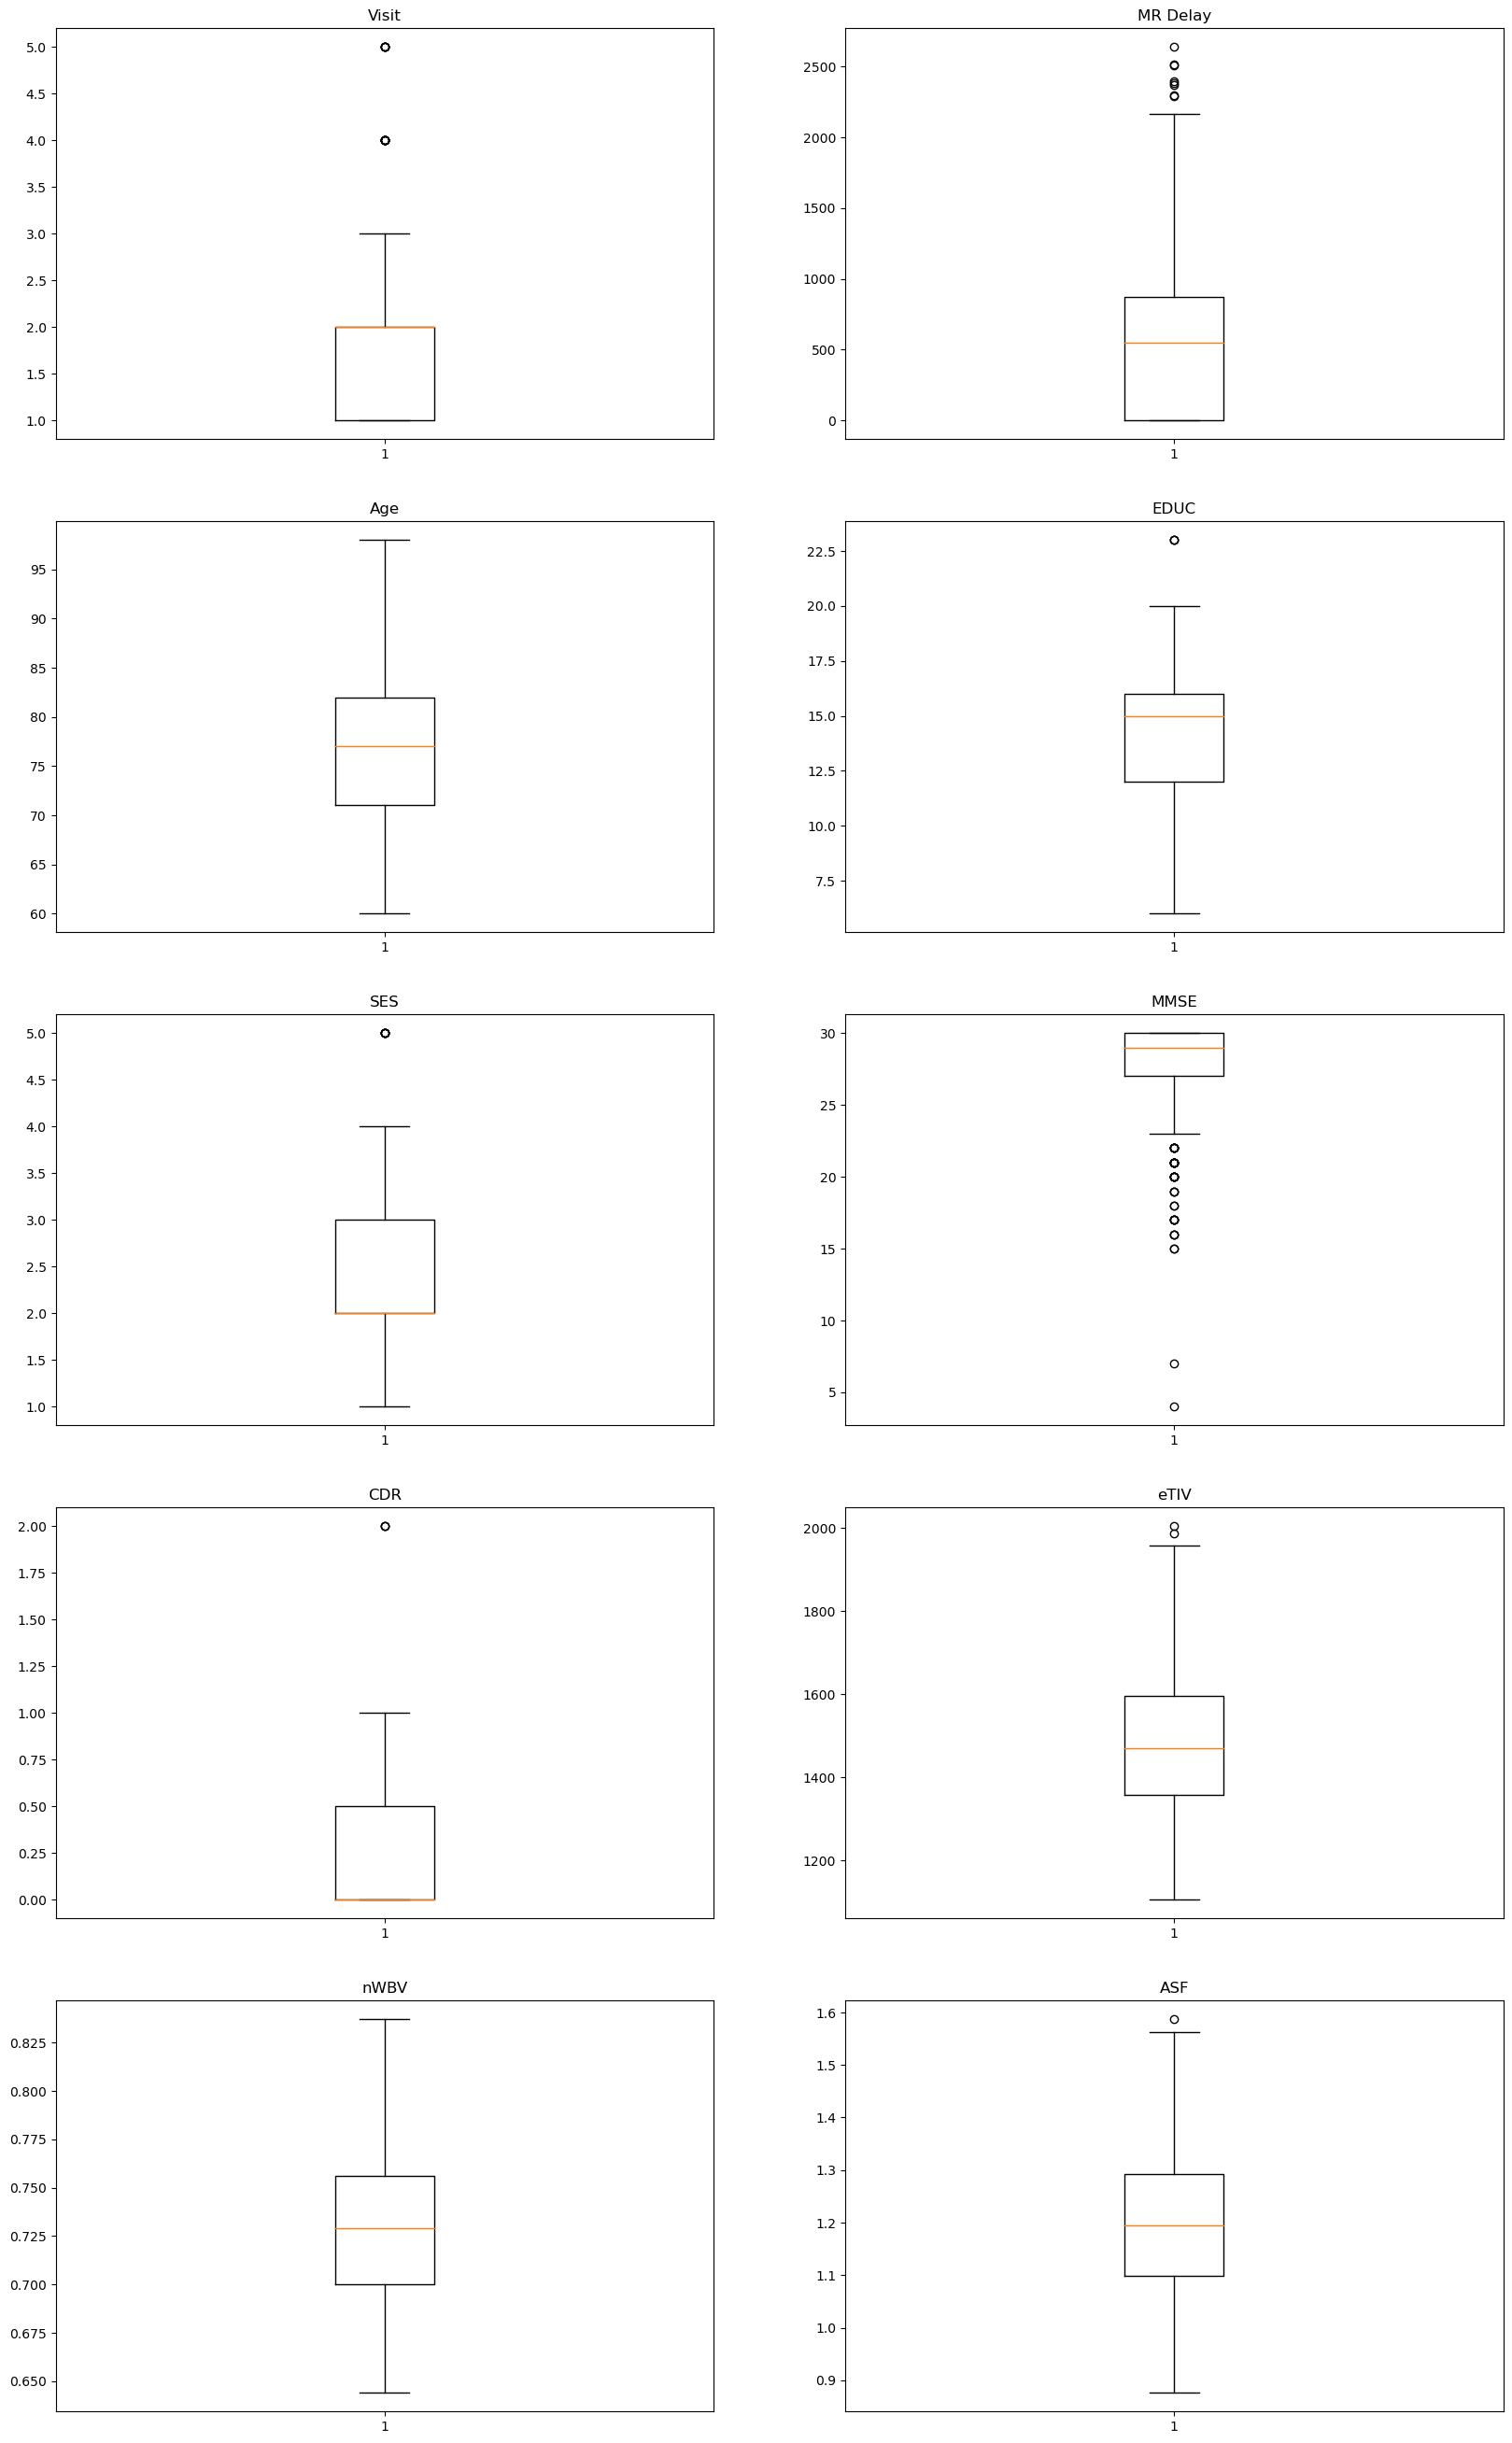

In [149]:
filtered = ['Visit', 'MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

plt.figure(figsize=(20,40))
for i, col in enumerate(filtered):
    plt.subplot(6,2,i+1)
    plt.boxplot(df_copy[col])
    plt.title(col)

plt.show()

### 4. Vizualizacija podataka

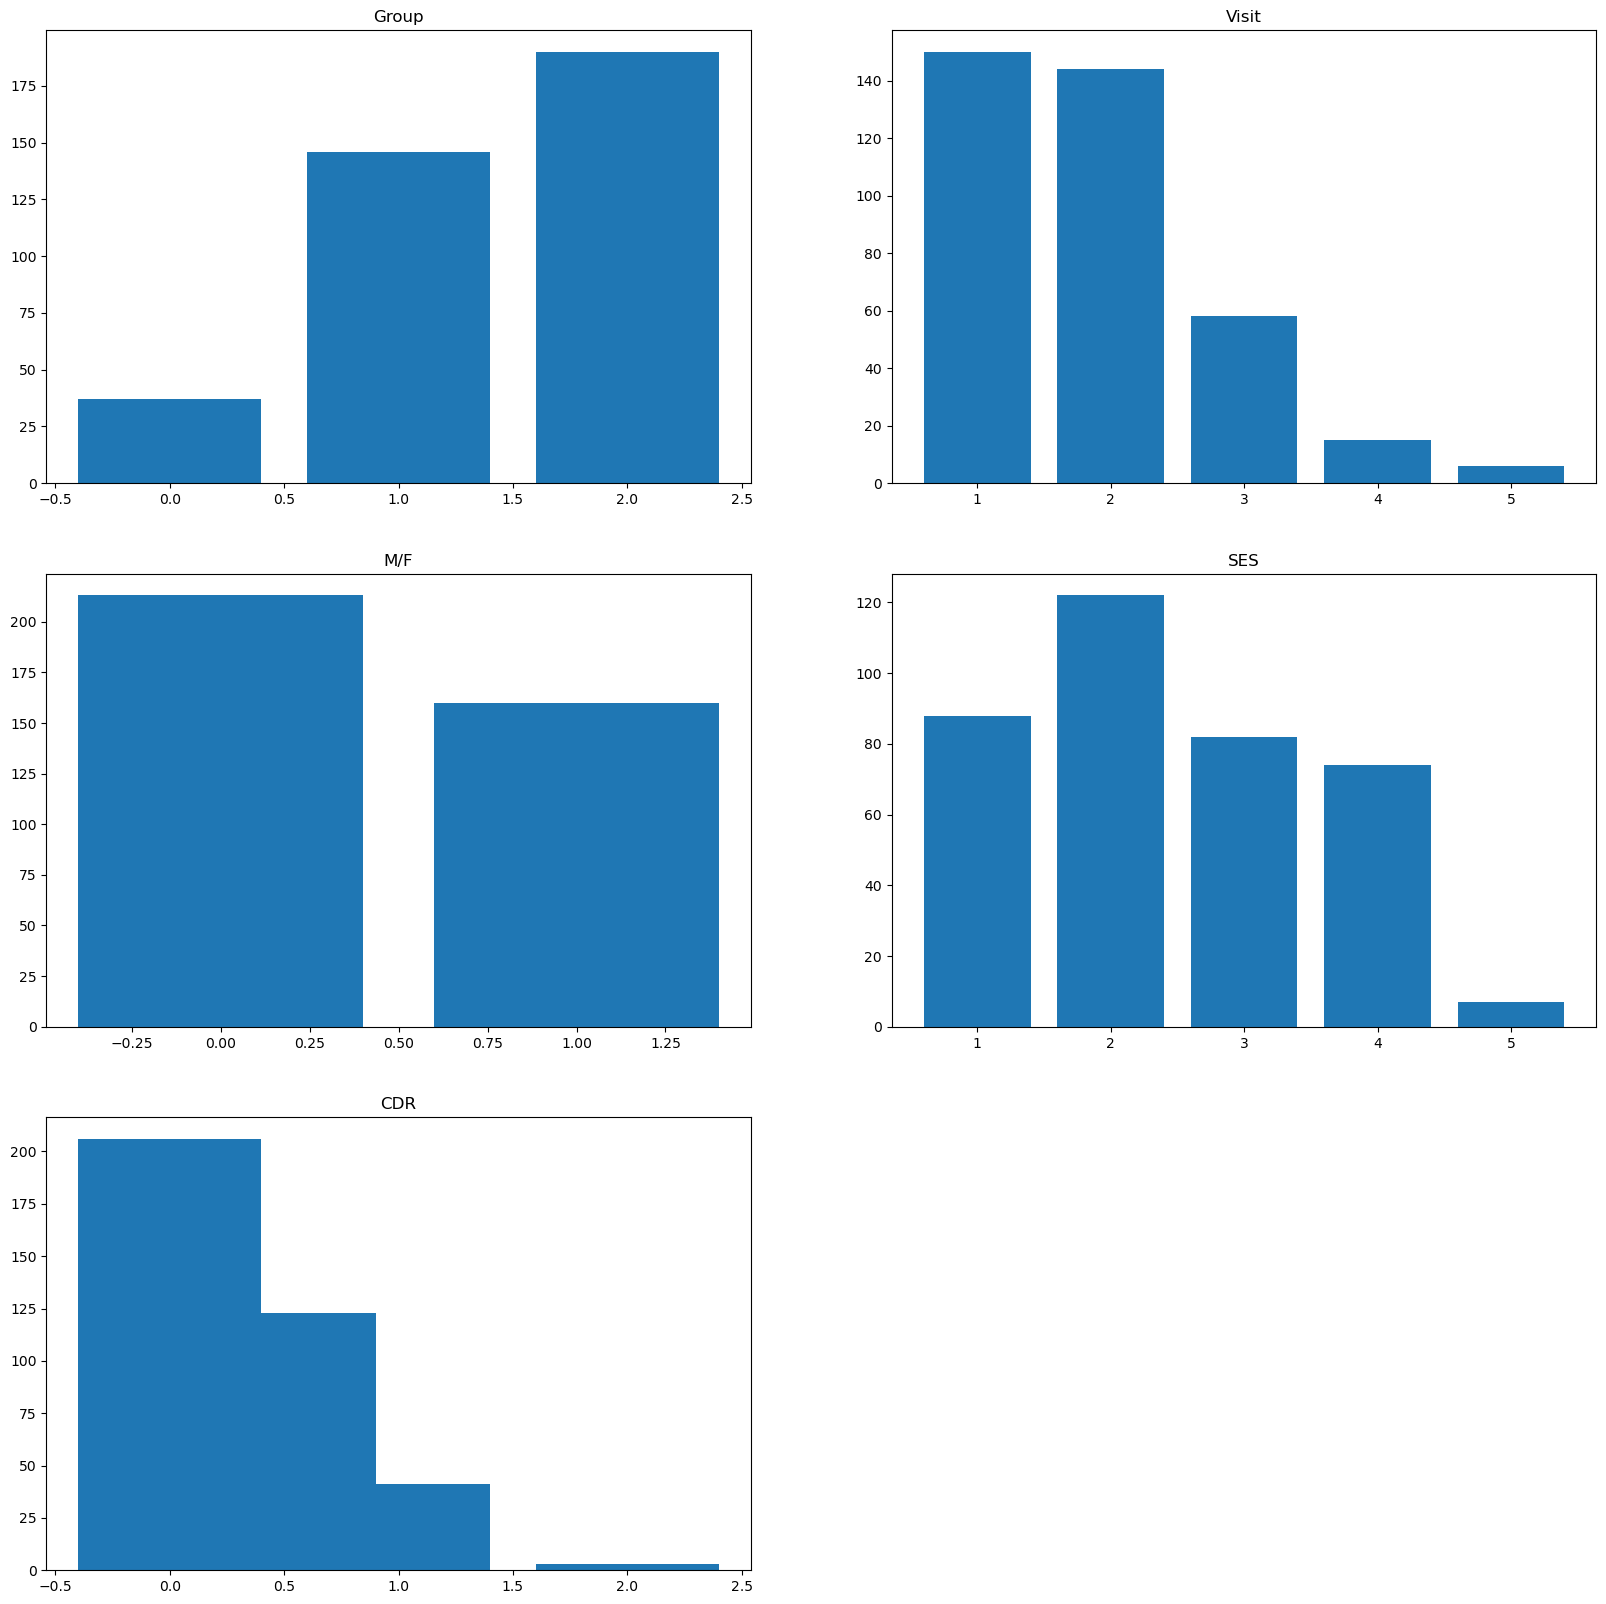

In [143]:
plt.figure(figsize=(20,20))

filtered = ['Group', 'Visit', 'M/F', 'SES', 'CDR']

for i, col in enumerate(filtered):
    plt.subplot(3,2,i+1)
    group_counts = df_copy[col].value_counts()
    group_names = group_counts.index
    plt.bar(group_names, group_counts)
    plt.title(col)

plt.show()

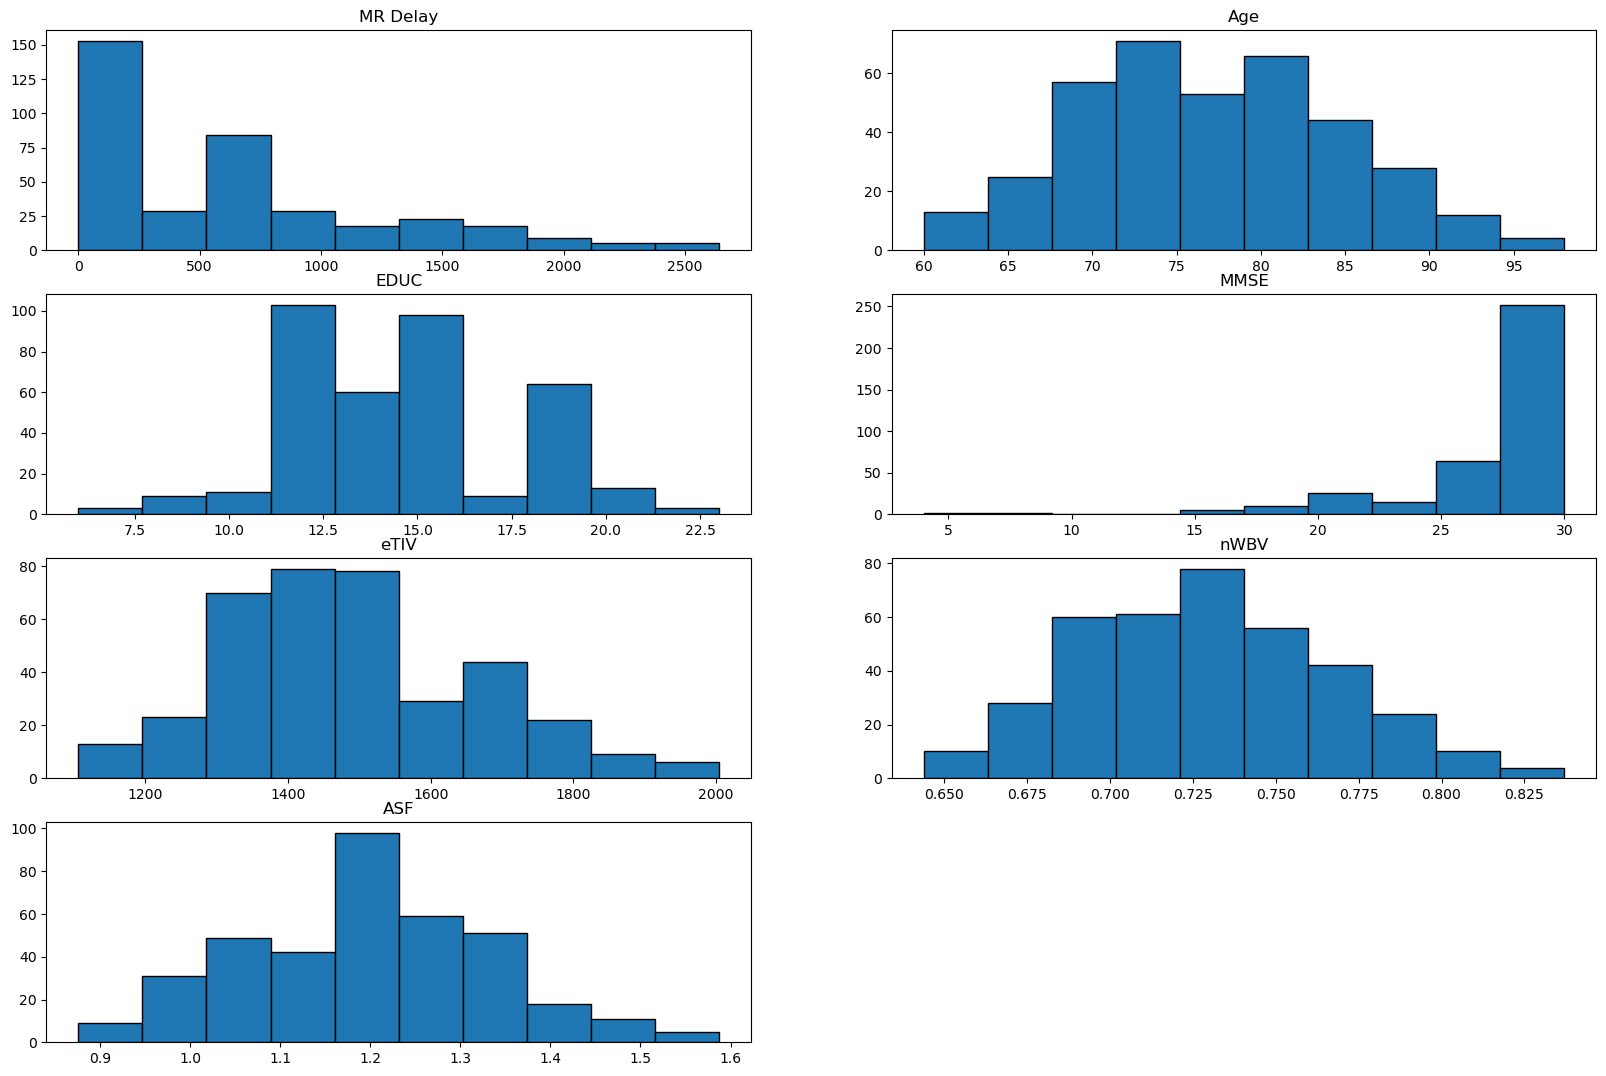

In [146]:
plt.figure(figsize=(20,20))

filtered = ['MR Delay', 'Age', 'EDUC', 'MMSE', 'eTIV', 'nWBV', 'ASF']

for i, col in enumerate(filtered):
    plt.subplot(6,2,i+1)
    plt.hist(df_copy[col], bins=10, edgecolor='k')
    plt.title(col)

plt.show()

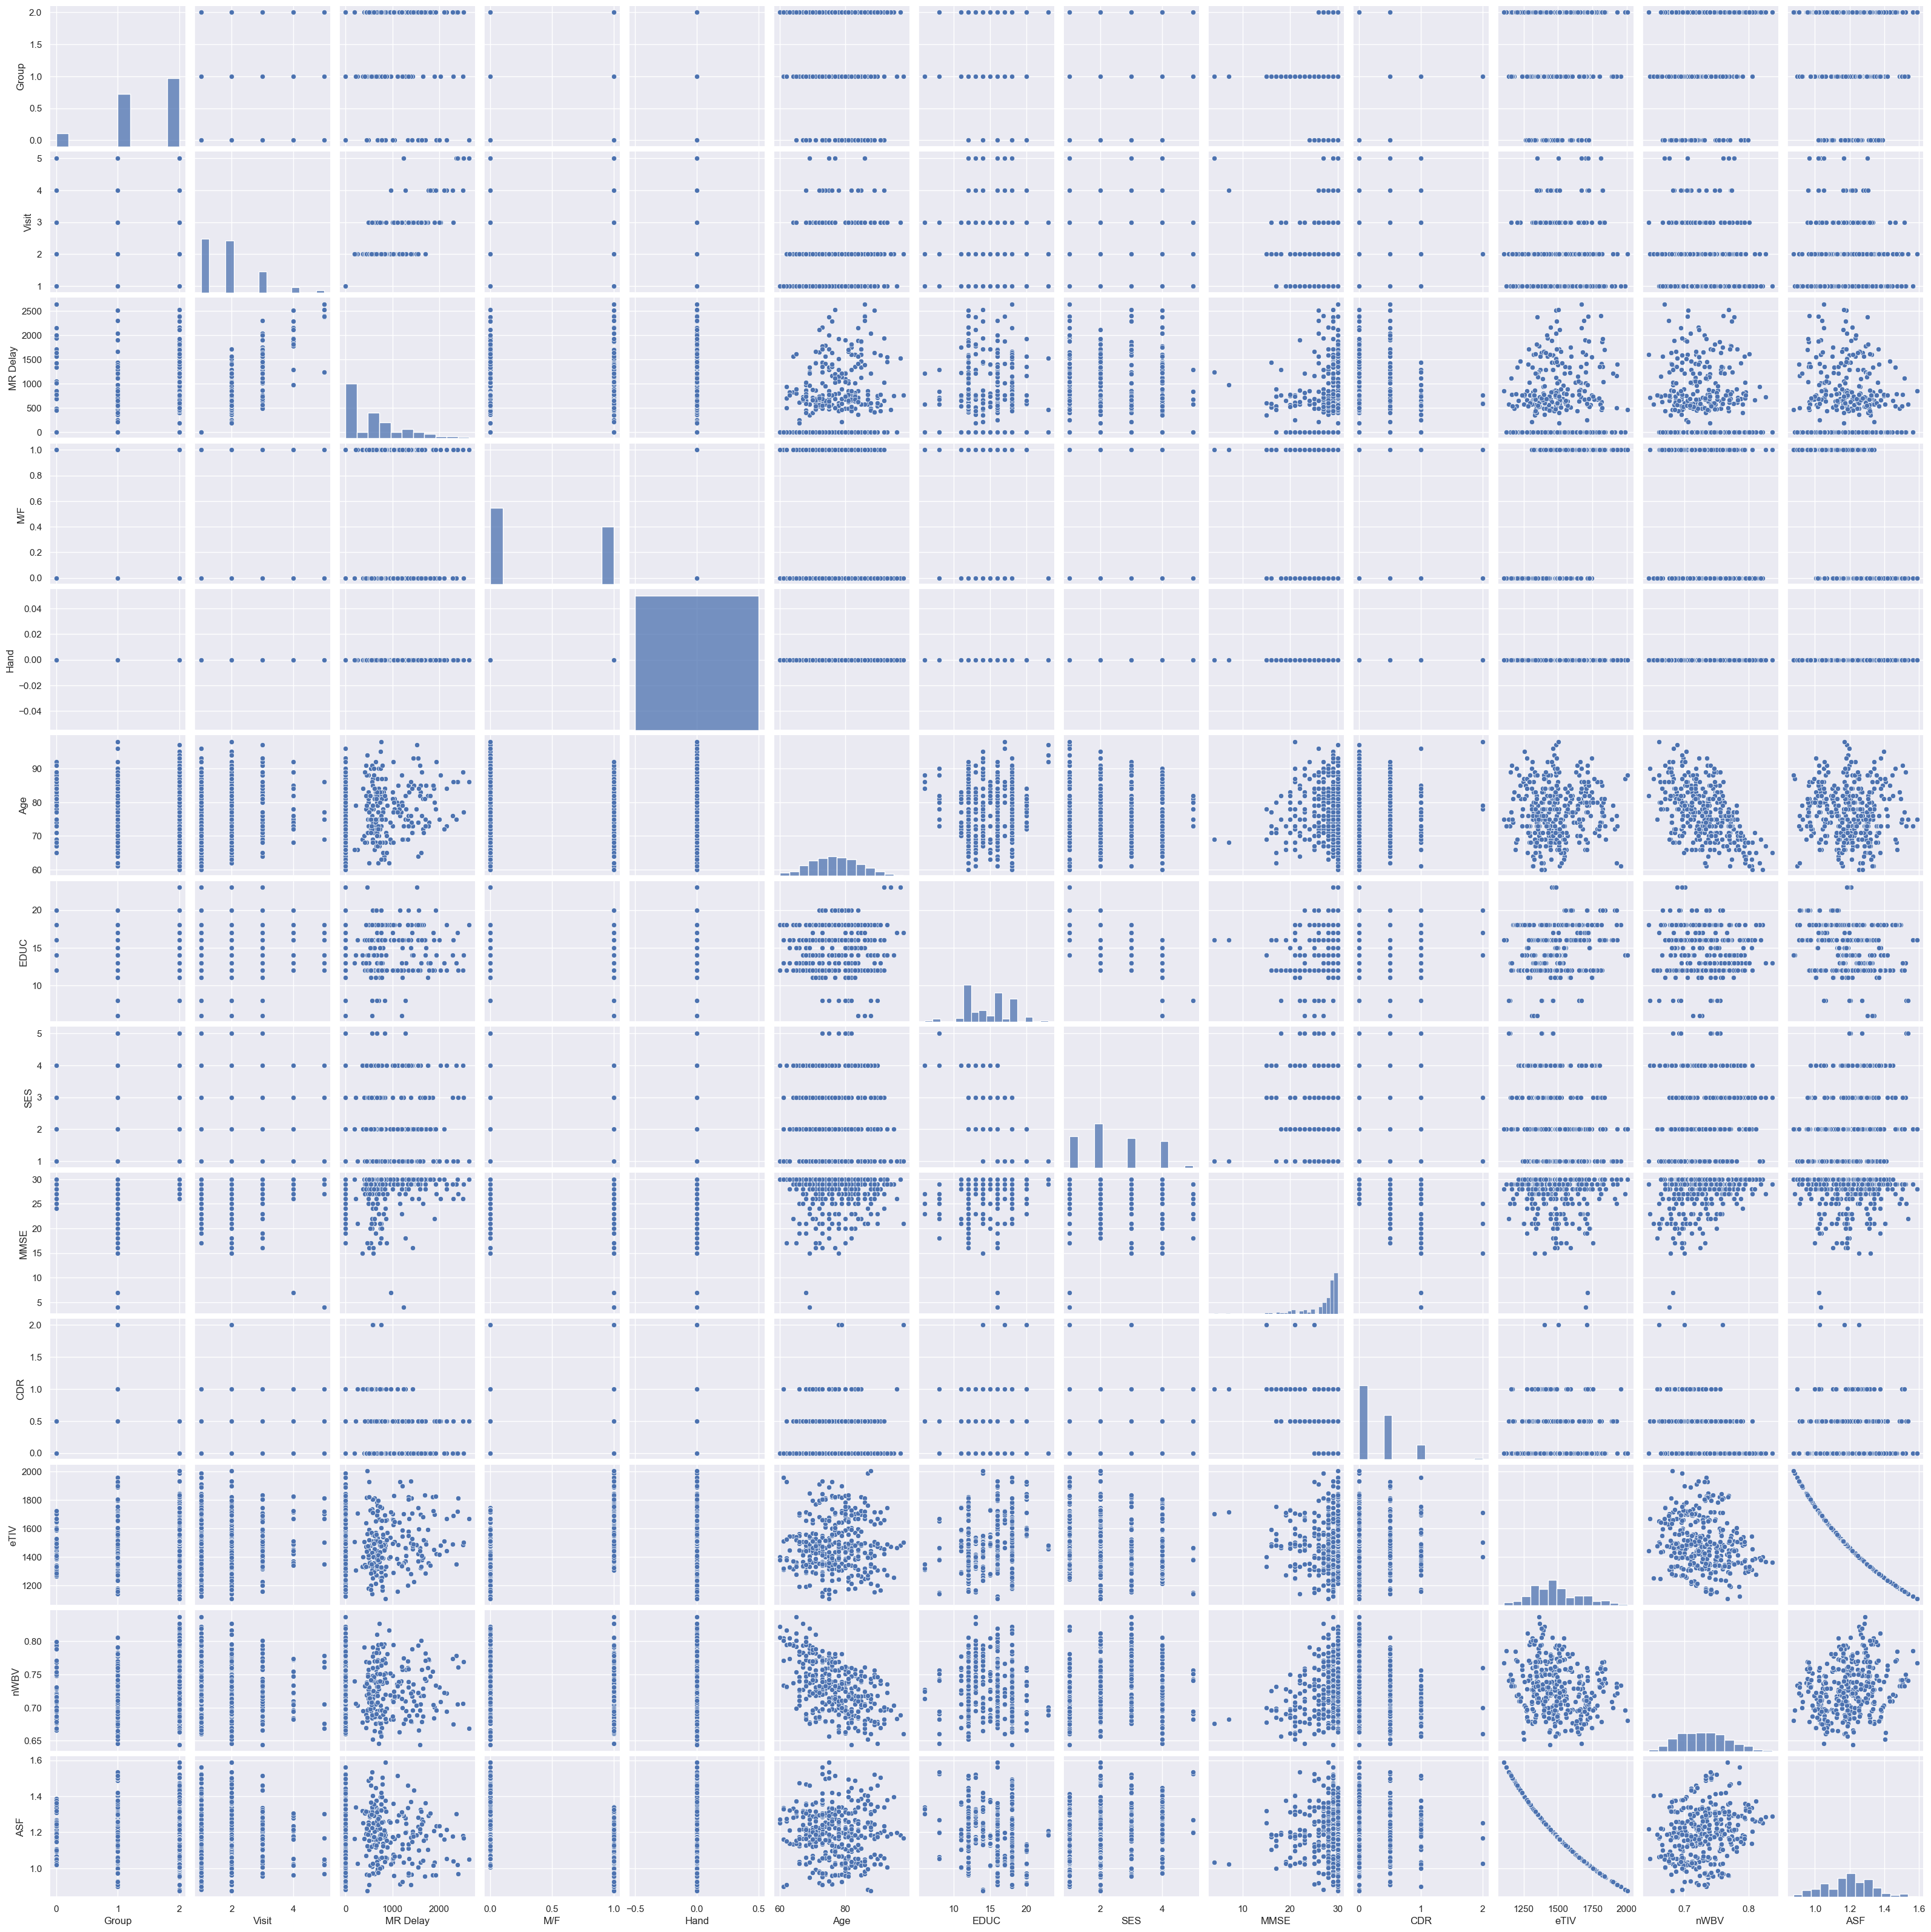

In [157]:
sns.set(rc={'figure.figsize':(60,30)})
sns.pairplot(df_copy)
plt.show()

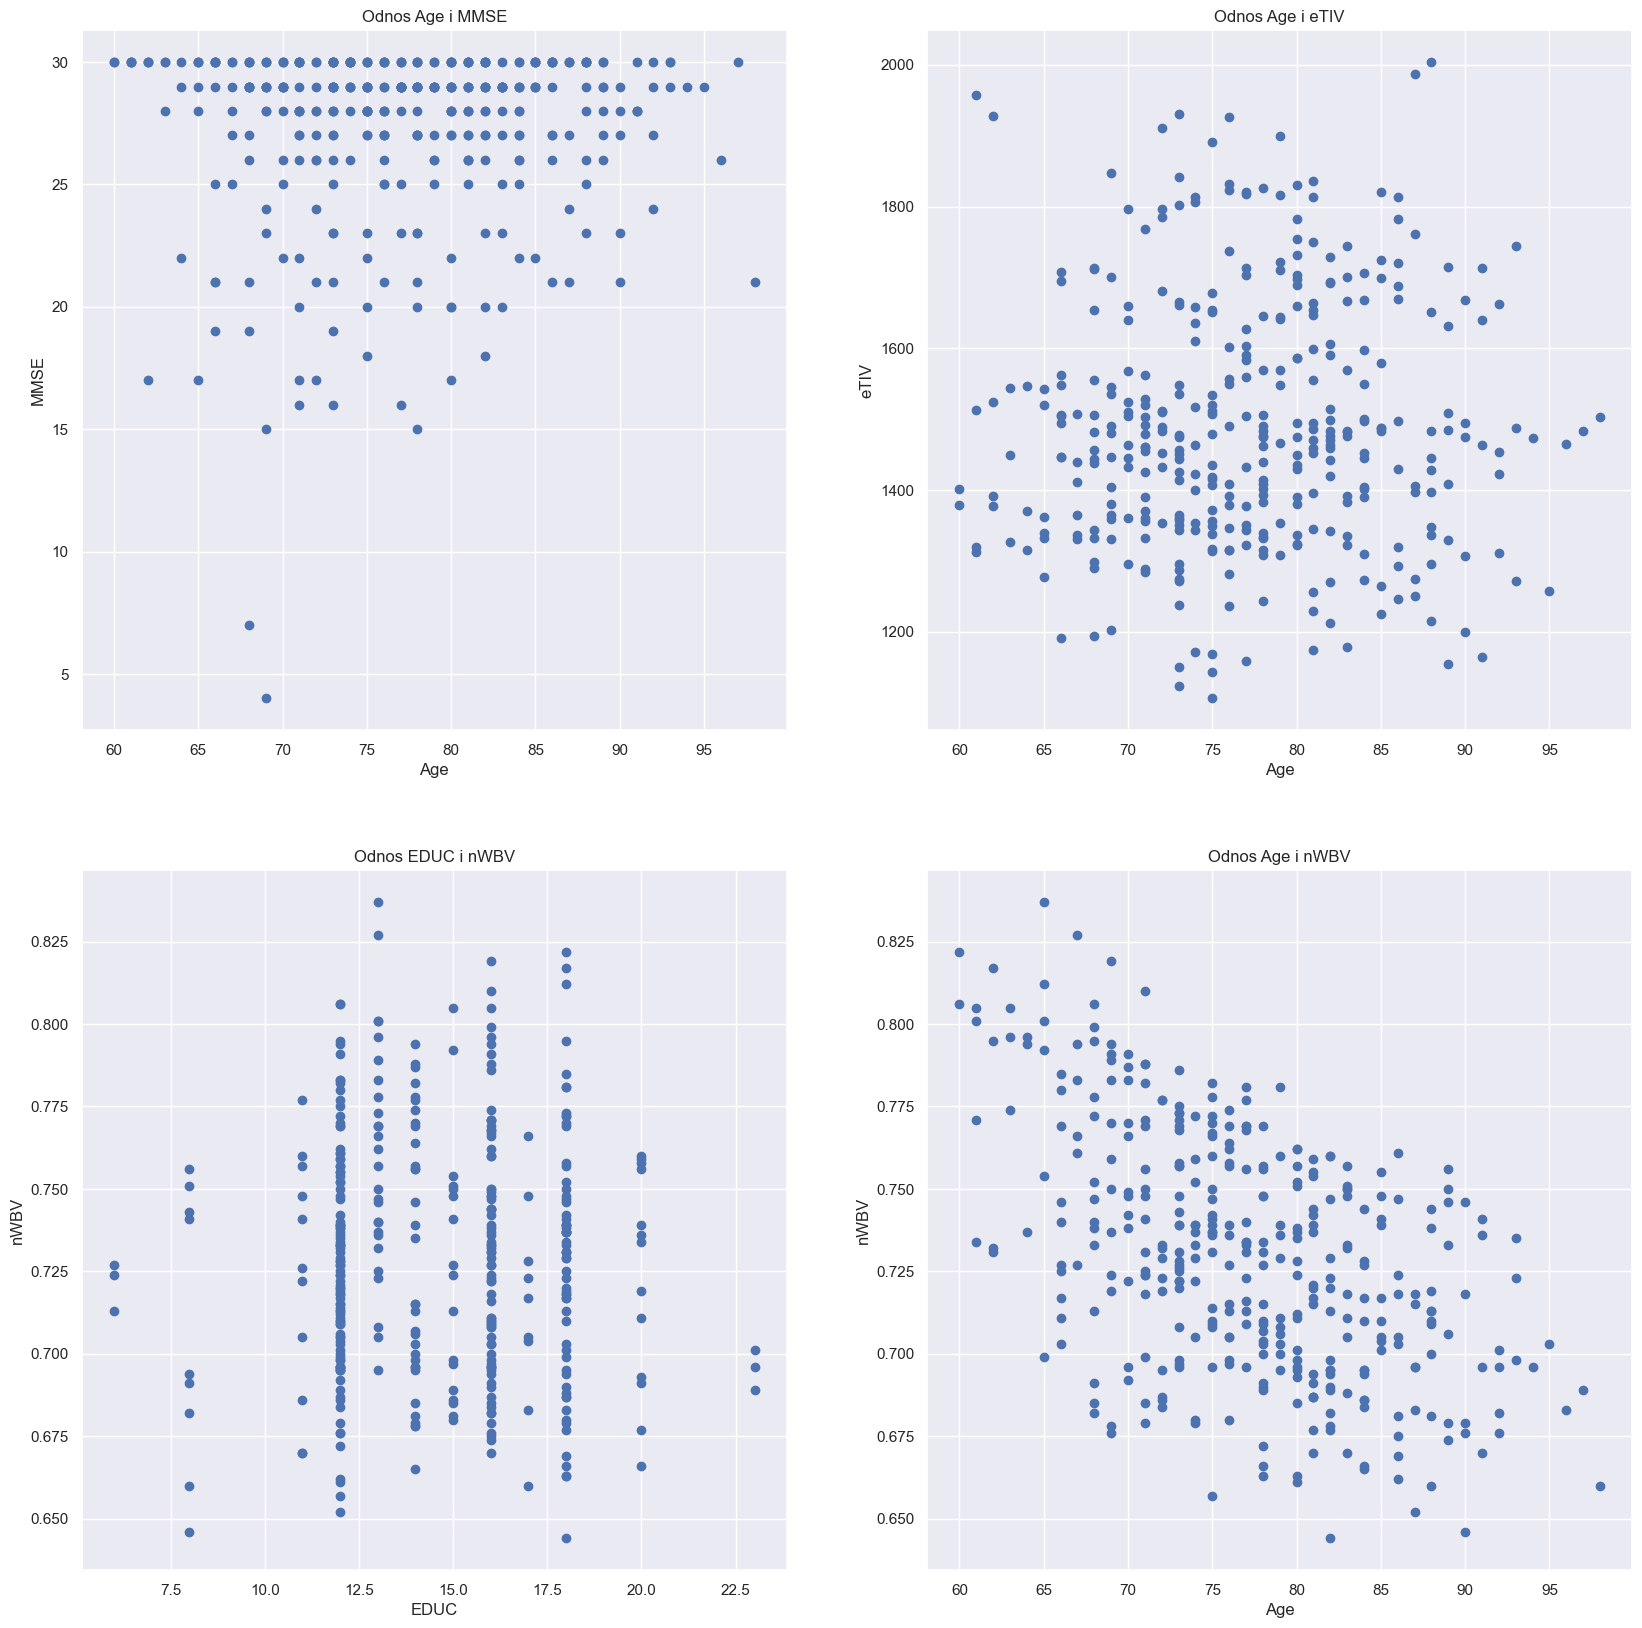

In [159]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
plt.scatter(df_copy['Age'], df_copy['MMSE'])
plt.xlabel('Age')
plt.ylabel('MMSE')
plt.title('Odnos Age i MMSE')

plt.subplot(2,2,2)
plt.scatter(df_copy['Age'], df_copy['eTIV'])
plt.xlabel('Age')
plt.ylabel('eTIV')
plt.title('Odnos Age i eTIV')

plt.subplot(2,2,3)
plt.scatter(df_copy['EDUC'], df_copy['nWBV'])
plt.xlabel('EDUC')
plt.ylabel('nWBV')
plt.title('Odnos EDUC i nWBV')

plt.subplot(2,2,4)
plt.scatter(df_copy['Age'], df_copy['nWBV'])
plt.xlabel('Age')
plt.ylabel('nWBV')
plt.title('Odnos Age i nWBV')


plt.show()

### 5. Analiza korelacije i zavisnosti

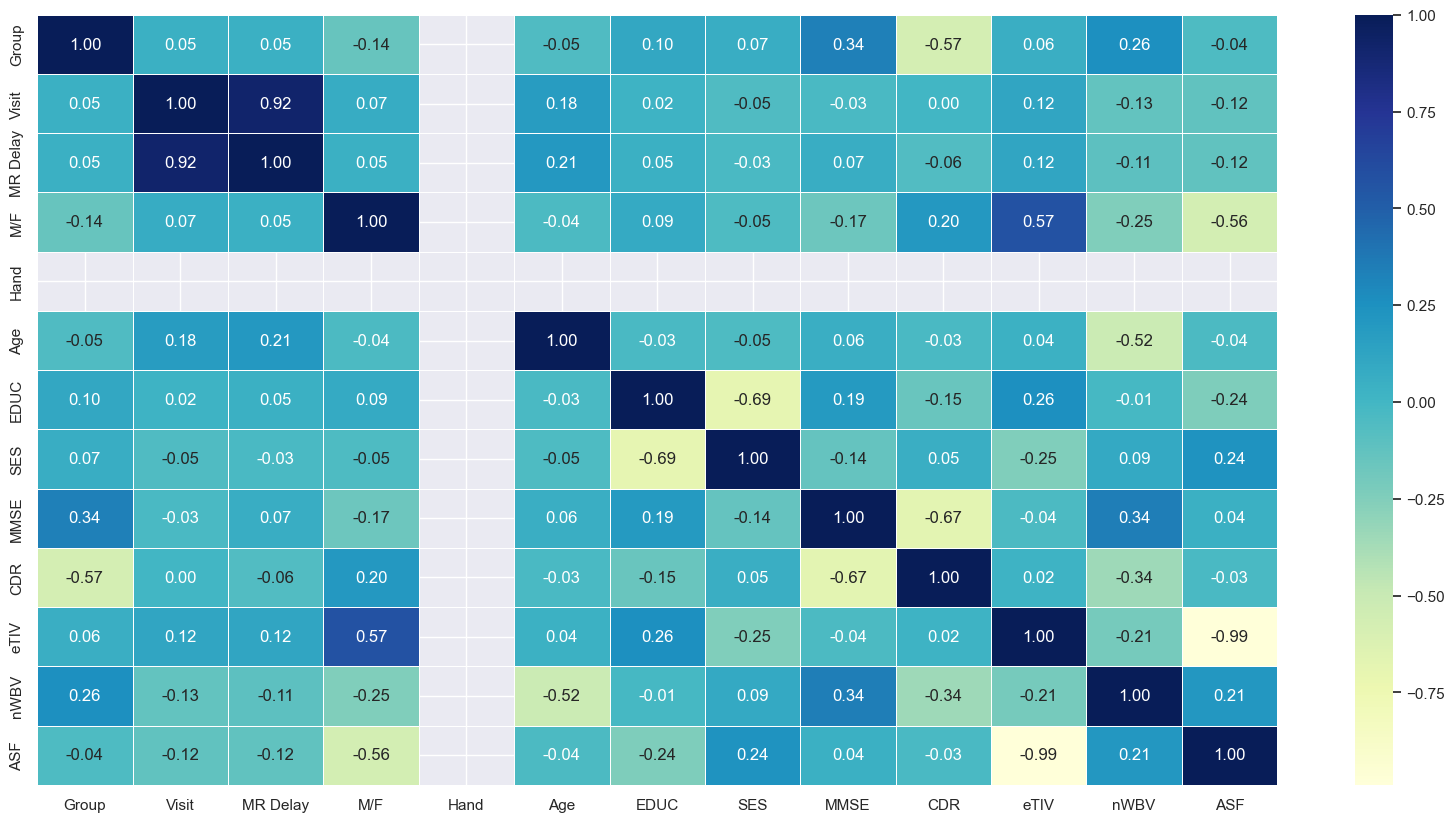

In [161]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(df_copy.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.show()